In [1]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Ver con glob para carpeta local
df= pd.read_csv('DEN_2020.csv', sep=';')

In [3]:
#Cantidad de Departamentos, Distritos y Provincias
df["Dep-Prov-Distrito"] = df["Departamento"] + ", " + df["Provincia"] + ", " + df["Distrito"]
df["Dep-Prov"] = df["Departamento"] + ", " + df["Provincia"]
print("La cantidad de departamentos es:", df['Departamento'].nunique())
print("La cantidad de distritos es:", df['Dep-Prov-Distrito'].nunique())
print("La cantidad de provincias es:", df['Dep-Prov'].nunique())

La cantidad de departamentos es: 20
La cantidad de distritos es: 376
La cantidad de provincias es: 89


In [4]:
df = df[['Dep-Prov-Distrito', 'Distrito', 'Semana', 'numero_casos','Casos', 'Año']] 

In [5]:
listaDistrito = df['Dep-Prov-Distrito'].tolist()
listaDistrito = list(dict.fromkeys(listaDistrito))
print('Son ', len(listaDistrito), ' distritos')
listaDistrito.sort()
print(listaDistrito)

Son  376  distritos
['AMAZONAS, BAGUA, ARAMANGO', 'AMAZONAS, BAGUA, BAGUA', 'AMAZONAS, BAGUA, COPALLIN', 'AMAZONAS, BAGUA, EL PARCO', 'AMAZONAS, BAGUA, IMAZA', 'AMAZONAS, BAGUA, LA PECA', 'AMAZONAS, BONGARA, JAZAN', 'AMAZONAS, CHACHAPOYAS, CHACHAPOYAS', 'AMAZONAS, CONDORCANQUI, EL CENEPA', 'AMAZONAS, CONDORCANQUI, NIEVA', 'AMAZONAS, CONDORCANQUI, RIO SANTIAGO', 'AMAZONAS, UTCUBAMBA, BAGUA GRANDE', 'AMAZONAS, UTCUBAMBA, CAJARURO', 'AMAZONAS, UTCUBAMBA, EL MILAGRO', 'AMAZONAS, UTCUBAMBA, JAMALCA', 'AREQUIPA, CARAVELI, BELLA UNION', 'AYACUCHO, CANGALLO, CANGALLO', 'AYACUCHO, HUAMANGA, AYACUCHO', 'AYACUCHO, HUAMANGA, JESUS NAZARENO', 'AYACUCHO, HUAMANGA, SAN JUAN BAUTISTA', 'AYACUCHO, HUANTA, CANAYRE', 'AYACUCHO, HUANTA, HUANTA', 'AYACUCHO, HUANTA, LLOCHEGUA', 'AYACUCHO, HUANTA, SANTILLANA', 'AYACUCHO, HUANTA, SIVIA', 'AYACUCHO, LA MAR, ANCHIHUAY', 'AYACUCHO, LA MAR, ANCO', 'AYACUCHO, LA MAR, AYNA', 'AYACUCHO, LA MAR, CHUNGUI', 'AYACUCHO, LA MAR, SAMUGARI', 'AYACUCHO, LA MAR, SANTA ROSA', 

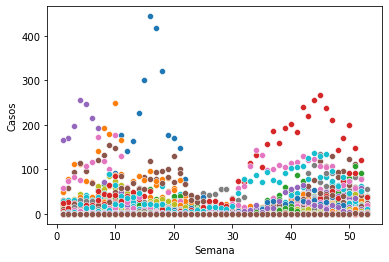

In [6]:
from sklearn.preprocessing import MinMaxScaler

timeSeries = pd.DataFrame()
#listaDistrito = listaDistrito[0:15]
for dis in listaDistrito:
    distrito=df[df['Dep-Prov-Distrito']==dis]
    distrito.sort_values(['Semana'], ascending = True)
    distrito = distrito.reset_index(drop=True)
    distrito = distrito.replace('nan', np.nan).fillna(0.000001)
    distrito = distrito.replace([np.inf, -np.inf], np.nan).fillna(0.000001)
    values_casos = distrito['Casos'].values
    values_casos = values_casos.reshape(-1,1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(values_casos)
    normalized = scaler.transform(values_casos)
    timeSeries = timeSeries.append(pd.Series(normalized.flatten()), ignore_index=True )
    #print(dis)
    ax = sns.scatterplot(y=distrito['Casos'], x= distrito['Semana'])
plt.show()

In [7]:
timeSeries.fillna(0.00001)

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.200000
1,0.416667,0.750000,0.000000,0.000000,0.000000,0.000000,0.083333,0.083333,0.083333,0.166667,...,0.333333,0.583333,0.5,0.833333,0.083333,0.333333,0.25,0.75,0.333333,0.083333
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000
3,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.400000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,1.000000,0.416667,0.333333,0.750000,0.250000,0.500000,0.583333,0.583333,0.166667,0.166667,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000
372,0.900000,1.000000,0.400000,0.300000,0.300000,0.400000,0.400000,0.600000,0.400000,0.200000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000
373,1.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000
374,0.328125,0.453125,0.781250,0.890625,0.937500,1.000000,0.328125,0.218750,0.203125,0.546875,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000


## Funciones de Distancias

In [8]:
import math
from math import sqrt, log, floor
from sklearn.metrics import mean_squared_error
from statistics import mean
from fastdtw import fastdtw
from scipy import stats
from scipy.spatial.distance import pdist

#Euclidean
def euclidean(x, y):
    r=np.linalg.norm(x-y)
    if math.isnan(r):
        r=1
    #print(r)
    return r

#Fast Dynamic time warping
def fast_DTW(x, y):
    r, _ = fastdtw(x, y, dist=euclidean)
    if math.isnan(r):
        r=1
    #print(r)
    return r

#Spearman
def scorr(x, y):
    r = stats.spearmanr(x, y)[0]
    if math.isnan(r):
        r=0
    #print(r)
    return 1 - r

#RMSE
def rmse(x, y):
    r=sqrt(mean_squared_error(x,y))
    if math.isnan(r):
        r=1
    #print(r)
    return r

def lcs(a, b):  
    lengths = [[0 for j in range(len(b)+1)] for i in range(len(a)+1)]
    # row 0 and column 0 are initialized to 0 already
    for i, x in enumerate(a):
        for j, y in enumerate(b):
            if x == y:
                lengths[i+1][j+1] = lengths[i][j] + 1
            else:
                lengths[i+1][j+1] = max(lengths[i+1][j], lengths[i][j+1])
    x, y = len(a), len(b)
    result = lengths[x][y]
    return result

def discretise(x):
    return int(x * 10)

def multidim_lcs(a, b):
    a = a.applymap(discretise)
    b = b.applymap(discretise)
    rows, dims = a.shape
    lcss = [lcs(a[i+2], b[i+2]) for i in range(dims)]
    return 1 - sum(lcss) / (rows * dims)

#Correlation
def corr(x, y):
    r=np.dot(x-mean(x),y-mean(y))/((np.linalg.norm(x-mean(x)))*(np.linalg.norm(y-mean(y))))
    if math.isnan(r):
        r=0
    #print(r)
    return 1 - r

In [9]:
n= timeSeries.shape[0]
n

376

In [10]:
timeSeries.shape

(376, 53)

## Distancias de matrices de distancias

In [11]:
#Euclidean
euclidean_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        euclidean_dist[i,j] = euclidean(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())

#DTW
dtw_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        dtw_dist[i,j] = fast_DTW(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())
    

In [12]:
#RMSE
rmse_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        rmse_dist[i,j] = rmse(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())
#Corr
corr_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        corr_dist[i,j] = corr(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())
#scorr
scorr_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        scorr_dist[i,j] = scorr(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())

# Juan Vicente

In [20]:
from sklearn.preprocessing import LabelEncoder
DIAMETER_METHODS = ['mean_cluster', 'farthest']
CLUSTER_DISTANCE_METHODS = ['nearest', 'farthest']

def inter_cluster_distances(labels, distances, method='nearest'):
    """Calculates the distances between the two nearest points of each cluster.
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: `nearest` for the distances between the two nearest points in each cluster, or `farthest`
    """
    if method not in CLUSTER_DISTANCE_METHODS:
        raise ValueError(
            'method must be one of {}'.format(CLUSTER_DISTANCE_METHODS))

    if method == 'nearest':
        return __cluster_distances_by_points(labels, distances)
    elif method == 'farthest':
        return __cluster_distances_by_points(labels, distances, farthest=True)


def __cluster_distances_by_points(labels, distances, farthest=False):
    n_unique_labels = len(np.unique(labels))
    cluster_distances = np.full((n_unique_labels, n_unique_labels),
                                float('inf') if not farthest else 0)

    np.fill_diagonal(cluster_distances, 0)

    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i, len(labels)):
            if labels[i] != labels[ii] and (
                (not farthest and
                 distances[i, ii] < cluster_distances[labels[i], labels[ii]])
                    or
                (farthest and
                 distances[i, ii] > cluster_distances[labels[i], labels[ii]])):
                cluster_distances[labels[i], labels[ii]] = cluster_distances[
                    labels[ii], labels[i]] = distances[i, ii]
    return cluster_distances


def diameter(labels, distances, method='farthest'):
    """Calculates cluster diameters
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: either `mean_cluster` for the mean distance between all elements in each cluster, or `farthest` for the distance between the two points furthest from each other
    """
    if method not in DIAMETER_METHODS:
        raise ValueError('method must be one of {}'.format(DIAMETER_METHODS))

    n_clusters = len(np.unique(labels))
    diameters = np.zeros(n_clusters)

    if method == 'mean_cluster':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii]:
                    diameters[labels[i]] += distances[i, ii]

        for i in range(len(diameters)):
            diameters[i] /= sum(labels == i)

    elif method == 'farthest':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii] and distances[i, ii] > diameters[
                        labels[i]]:
                    diameters[labels[i]] = distances[i, ii]
    return diameters

def dunn(labels, distances, diameter_method='farthest',
         cdist_method='nearest'):
    """
    Dunn index for cluster validation (larger is better).
    
    .. math:: D = \\min_{i = 1 \\ldots n_c; j = i + 1\ldots n_c} \\left\\lbrace \\frac{d \\left( c_i,c_j \\right)}{\\max_{k = 1 \\ldots n_c} \\left(diam \\left(c_k \\right) \\right)} \\right\\rbrace
    
    where :math:`d(c_i,c_j)` represents the distance between
    clusters :math:`c_i` and :math:`c_j`, and :math:`diam(c_k)` is the diameter of cluster :math:`c_k`.
    Inter-cluster distance can be defined in many ways, such as the distance between cluster centroids or between their closest elements. Cluster diameter can be defined as the mean distance between all elements in the cluster, between all elements to the cluster centroid, or as the distance between the two furthest elements.
    The higher the value of the resulting Dunn index, the better the clustering
    result is considered, since higher values indicate that clusters are
    compact (small :math:`diam(c_k)`) and far apart (large :math:`d \\left( c_i,c_j \\right)`).
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param diameter_method: see :py:function:`diameter` `method` parameter
    :param cdist_method: see :py:function:`diameter` `method` parameter
    
    .. [Kovacs2005] Kovács, F., Legány, C., & Babos, A. (2005). Cluster validity measurement techniques. 6th International Symposium of Hungarian Researchers on Computational Intelligence.
    """

    labels = LabelEncoder().fit(labels).transform(labels)
    
    

    ic_distances = inter_cluster_distances(labels, distances, cdist_method)
    #print("IC",ic_distances)
    if len(ic_distances[ic_distances.nonzero()])==0:
        min_distance = 0
    else:
        min_distance = min(ic_distances[ic_distances.nonzero()])
    max_diameter = max(diameter(labels, distances, diameter_method))
    
    

    return min_distance / max_diameter

In [21]:
import scipy.cluster.hierarchy as hac
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score

#Experimentos HAC
HAC_euc = AgglomerativeClustering(n_clusters=k).fit_predict(euclidean_dist)
silhouette_avg=silhouette_score( euclidean_dist, HAC_euc)
print("HAC + euclidian distance: ")
print("SC: ",silhouette_score( euclidean_dist, HAC_euc))
print("CHZ: ",calinski_harabasz_score(euclidean_dist, HAC_euc))
print("DUNN: ",dunn(HAC_euc, euclidean_dist, 'farthest', 'farthest'))
#HAC_rmse = AgglomerativeClustering(n_clusters=k).fit_predict(f_rmse_dist)
#print("HAC + rmse distance: ",silhouette_score( f_rmse_dist, HAC_rmse))
HAC_corr = AgglomerativeClustering(n_clusters=k).fit_predict(corr_dist)
print("HAC + corr distance: ")
print("SC: ",silhouette_score( corr_dist,HAC_corr))
print("CHZ: ",calinski_harabasz_score(corr_dist,HAC_corr))
print("DUNN: ",dunn(HAC_corr, corr_dist, 'farthest', 'farthest'))
#print("HAC + corr distance: ",0.0)
HAC_scorr = AgglomerativeClustering(n_clusters=k).fit_predict(scorr_dist)
print("HAC + scorr distance: ")
print("SC: ",silhouette_score( scorr_dist, HAC_scorr))
print("CHZ: ",calinski_harabasz_score(scorr_dist, HAC_scorr))
print("DUNN: ",dunn(HAC_scorr, scorr_dist, 'farthest', 'farthest'))
HAC_dtw = AgglomerativeClustering(n_clusters=k).fit_predict(dtw_dist)
print("HAC + dtw distance: ")
print("SC: ",silhouette_score( dtw_dist, HAC_dtw))
print("CHZ: ",calinski_harabasz_score(dtw_dist, HAC_dtw))
print("DUNN: ",dunn(HAC_dtw, dtw_dist, 'farthest', 'farthest'))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


HAC + euclidian distance: 
SC:  0.32589580952107483
CHZ:  184.22666091109843
DUNN:  0.4946641308174149
HAC + corr distance: 
SC:  0.34810384659114285
CHZ:  350.94950651501966
DUNN:  0.7375223599072482


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


HAC + scorr distance: 
SC:  0.34972379722706326
CHZ:  300.3819006088726
DUNN:  0.6270513443529152
HAC + dtw distance: 
SC:  0.3155502460575636
CHZ:  200.7748516953139
DUNN:  0.48308706801807294


In [22]:
km_euc = KMeans(n_clusters=k).fit_predict(euclidean_dist)
silhouette_avg=silhouette_score( euclidean_dist, km_euc)
print("KM + euclidian distance: ")
print("SC: ",silhouette_score( euclidean_dist, km_euc))
print("CHZ: ",calinski_harabasz_score(euclidean_dist, km_euc))
print("DUNN: ",dunn(km_euc, euclidean_dist, 'farthest', 'farthest'))
#km_rmse = KMeans(n_clusters=k).fit_predict(rmse_dist)
#print("KM + rmse distance: ")
#print("SC: ",silhouette_score( rmse_dist, km_rmse))
#print("DUNN: ",base.dunn(km_rmse))
km_corr = KMeans(n_clusters=k).fit_predict(corr_dist)
print("KM + corr distance: ")
print("SC: ",silhouette_score( corr_dist, km_corr))
print("CHZ: ",calinski_harabasz_score(corr_dist, km_corr))
print("DUNN: ",dunn(km_corr, corr_dist, 'farthest', 'farthest'))
km_scorr = KMeans(n_clusters=k).fit_predict(scorr_dist)
print("KM + scorr distance: ")
print("SC: ",silhouette_score( scorr_dist, km_scorr))
print("CHZ: ",calinski_harabasz_score(scorr_dist, km_scorr))
print("DUNN: ",dunn(km_scorr, scorr_dist, 'farthest', 'farthest'))
km_dtw = KMeans(n_clusters=k).fit_predict(dtw_dist)
print("KM + dtw distance: ")
print("SC: ",silhouette_score( dtw_dist, km_dtw))
print("CHZ: ",calinski_harabasz_score(dtw_dist, km_dtw))
print("DUNN: ",dunn(km_dtw, dtw_dist, 'farthest', 'farthest'))

KM + euclidian distance: 
SC:  0.36090428109169637
CHZ:  227.28268387198617
DUNN:  0.4946641308174149
KM + corr distance: 
SC:  0.35790436140206366
CHZ:  393.39062809031446
DUNN:  0.6962829782908712
KM + scorr distance: 
SC:  0.4056918913162737
CHZ:  362.81580616101195
DUNN:  0.6270513443529152
KM + dtw distance: 
SC:  0.3555272435172088
CHZ:  241.85315070344748
DUNN:  0.54421768707483


# Experimentos DBSCAN

El puntaje es negativo porque los puntos están en promedio más cerca de otro cluster, que del cuál ha sido asignado

In [23]:
#CON EUCLIDEAN
DB_euc = DBSCAN(eps=3, min_samples=2).fit_predict(euclidean_dist)
silhouette_avg=silhouette_score( euclidean_dist, DB_euc)
print("DBSCAN + euclidian distance: ")
print("SC: ",silhouette_score( euclidean_dist, DB_euc))
print("CHZ: ",calinski_harabasz_score(euclidean_dist, DB_euc))
print("DUNN: ",dunn(DB_euc, euclidean_dist, 'farthest', 'farthest'))

#CON CORRELATION
DB_corr = DBSCAN(eps=3, min_samples=2).fit_predict(corr_dist)
print("DBSCAN + corr distance: ")
print("SC: ",silhouette_score( corr_dist, DB_corr))
print("CHZ: ",calinski_harabasz_score(corr_dist, DB_corr))
print("DUNN: ",dunn(DB_corr, corr_dist, 'farthest', 'farthest'))

#CON SPEARMAN
DB_scorr = DBSCAN(eps=3, min_samples=2).fit_predict(scorr_dist)
print("DBSCAN + scorr distance: ")
print("SC: ",silhouette_score( scorr_dist, DB_scorr))
print("CHZ: ",calinski_harabasz_score(scorr_dist, DB_scorr))
print("DUNN: ",dunn(DB_scorr, scorr_dist, 'farthest', 'farthest'))

#CON D TIME WARPING
DB_dtw = DBSCAN(eps=3, min_samples=2).fit_predict(dtw_dist)
print("DBSCAN + dtw distance: ")
print("SC: ",silhouette_score( dtw_dist, DB_dtw))
print("CHZ: ",calinski_harabasz_score( dtw_dist, DB_dtw))
print("DUNN: ",dunn(DB_dtw, dtw_dist, 'farthest', 'farthest'))

DBSCAN + euclidian distance: 
SC:  -0.11482635835879622
CHZ:  25.531122901551715
DUNN:  0.24365656632795893
DBSCAN + corr distance: 
SC:  -0.13005598588568126
CHZ:  0.8735079266725739
DUNN:  0.6017015009698642
DBSCAN + scorr distance: 
SC:  0.21793456154774848
CHZ:  137.66033915276992
DUNN:  0.6270513443529152
DBSCAN + dtw distance: 
SC:  -0.07586384622257468
CHZ:  8.077436918060421
DUNN:  0.04104903078677309


In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(normalized_df)
plt.figure(figsize=(10, 7))  
plt.scatter(y=normalized_df, c=cluster.labels_) 

NameError: name 'normalized_df' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize


normalized_df = pd.DataFrame(normalized_df, columns='')
clusters_range = range(2,15)
results = []
for c in clusters_range:
        clusterer = KMeans(init='k-means++', n_clusters=c, n_init=100, random_state=0)
        cluster_labels = clusterer.fit_predict(normalized_df)
        silhouette_avg = silhouette_score(normalized_df, cluster_labels)
        results.append([c,silhouette_avg])

result = pd.Dataframe(results, columns=["n_clusters", "sulhouette_score"])
pivot_km = pd.pivot_table(result, index = "n_clusters", values = "silhouette_score")

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidth=.5, fmt='.3f', cmap= sns.rocket_r)
plt.tight_layout()


In [ ]:
kmeans_sel = KMeans(init='k-means++', n_clusters=6, n_init=100, random_state=1).fit(df_2)
labels = pd.Dataframe(kmeans_sel.leabels_)
clustered_data = cluster_dara.assign(Cluster=labels)

In [ ]:
scatters(clustered_data, h='Cluster')

# GIO

In [ ]:
from tslearn.metrics import dtw
dtw_score = dtw(x, y)
soft_dtw_score = soft_dtw(x, y, gamma=.1)

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=10, random_state=4)
model.fit(timeSeries.T)

In [ ]:
model.cluster_centers_.shape